# Import Library

In [1]:
#for data manupulating
import numpy as np
import pandas as pd

#for preprocessin sate
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#for classification model
from sklearn.naive_bayes import GaussianNB

#for checking accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     
import scikitplot as skplt

In [2]:
diabetes = pd.read_csv('diabetic_data.csv', skiprows=1,header = None)  
#diabetes

# Feature Selection

In [3]:
#for features selection and preprocessing
#we neglect 13 , 14 , 15 columns
x1 = pd.read_csv('diabetic_data.csv',header=None,skiprows=1,usecols=range(0,13)).dropna()
x2 = pd.read_csv('diabetic_data.csv',header=None,skiprows=1,usecols=range(16,38)).dropna()
Data1 = x1.join(x2)

#transform Dataframe to array
Data = np.array(Data1)
print(Data.shape)

(101766, 35)


# Label Encoder

In [4]:
#To encode Label1
Data[:,range(14,35)]

array([['None', 'None', 'No', ..., 'No', 'No', 'No'],
       ['None', 'None', 'No', ..., 'No', 'Up', 'Yes'],
       ['None', 'None', 'No', ..., 'No', 'No', 'Yes'],
       ...,
       ['None', 'None', 'Steady', ..., 'No', 'Down', 'Yes'],
       ['None', 'None', 'No', ..., 'No', 'Up', 'Yes'],
       ['None', 'None', 'No', ..., 'No', 'No', 'No']], dtype=object)

In [5]:
#for Interger Encoding to Categorical data
le = LabelEncoder()

for i in range (14,35):
    le.fit(Data[:,i])
    Data[:,i] = le.transform(Data[:,i])

Data[:,range(14,35)]

array([[2, 2, 1, ..., 0, 1, 0],
       [2, 2, 1, ..., 0, 3, 1],
       [2, 2, 1, ..., 0, 1, 1],
       ...,
       [2, 2, 2, ..., 0, 0, 1],
       [2, 2, 1, ..., 0, 3, 1],
       [2, 2, 1, ..., 0, 1, 0]], dtype=object)

In [6]:
#To encode Label2
Data[:,range(1,3)]

array([['Female', '[0-10)'],
       ['Female', '[10-20)'],
       ['Female', '[20-30)'],
       ...,
       ['Male', '[70-80)'],
       ['Female', '[80-90)'],
       ['Male', '[70-80)']], dtype=object)

In [7]:
for i in range (1,3):
    le = LabelEncoder()
    le.fit(Data[:,i])
    Data[:,i] = le.transform(Data[:,i])
    
Data[:,range(1,3)]

array([[0, 0],
       [0, 1],
       [0, 2],
       ...,
       [1, 7],
       [0, 8],
       [1, 7]], dtype=object)

In [8]:
Data                                #Total Data

array([[8222157, 0, 0, ..., 0, 1, 0],
       [55629189, 0, 1, ..., 0, 3, 1],
       [86047875, 0, 2, ..., 0, 1, 1],
       ...,
       [41088789, 1, 7, ..., 0, 0, 1],
       [31693671, 0, 8, ..., 0, 3, 1],
       [175429310, 1, 7, ..., 0, 1, 0]], dtype=object)

# Input / Output Declaration

In [9]:
X = Data[:,range(1,34)]
X.shape

(101766, 33)

In [10]:
Y = Data[:,range(34,35)]

#Change Y Data Type
y = Y.ravel()
Y = np.array(y).astype(int)

Y.shape

(101766,)

# Shuffle Data

In [11]:
X,Y = shuffle(X,Y,random_state=1) 

# Train / Test Split

In [12]:
#spliting samples into train data and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(71236, 33)
(71236,)
(30530, 33)
(30530,)


# Naive Baye Models

In [14]:
from sklearn.naive_bayes import GaussianNB      #Import model 

gnb = GaussianNB()                                    #delcare gnb as model 
gnb.fit(x_train,y_train)
#gnb.fit(x_train, y_train.astype(int))                             #model.Train dat

GaussianNB(priors=None, var_smoothing=1e-09)

# Predicting train and test samples

In [15]:
#predicting train and test samples
y_train_predict = gnb.predict(x_train)
y_test_predict = gnb.predict(x_test)

In [16]:
#testing the accuracy score of train and test data
train_accuracy = accuracy_score(y_train,y_train_predict)
test_accuracy = accuracy_score(y_test,y_test_predict)
print(train_accuracy)
print(train_accuracy)

0.9978381717109327
0.9978381717109327


In [17]:
#testing the confusion matrix of train and test data

print(confusion_matrix(y_train,y_train_predict))
print('_______________________________\n')
print(confusion_matrix(y_test,y_test_predict))

[[16479     1]
 [  153 54603]]
_______________________________

[[ 6922     1]
 [   54 23553]]


# 3D Confusion Metrix

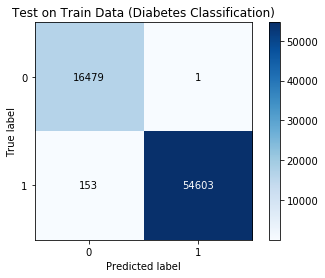

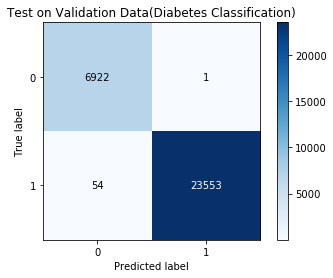

In [19]:
#(4) Accuracy measure & Plot  (Confusion Matrix)

skplt.metrics.plot_confusion_matrix(y_train, y_train_predict,
                                    title = "Test on Train Data (Diabetes Classification)",  
                                    normalize=False)                         #pip install scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, y_test_predict,
                                    title ="Test on Validation Data(Diabetes Classification)", 
                                    normalize=False)                         #pip install scikit-plot